In [1]:
#imdb dataset
#LTSM RNN

In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

#number of words to consider as features
max_features = 10000
#cuts off texts after this many words
maxlen = 500

batch_size = 32

In [4]:
print('Loading data...')
(input_train, y_train),(input_test,y_test) = imdb.load_data(num_words=max_features)
print(len(input_train),'train sequence')
print(len(input_test),'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train,maxlen=maxlen)
input_test = sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape', input_test.shape)

Loading data...
25000 train sequence
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape (25000, 500)


In [6]:
from keras.layers import Dense,Embedding,LSTM
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.4956 - acc: 0.7695 - val_loss: 0.3742 - val_acc: 0.8474
Epoch 2/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.2933 - acc: 0.8831 - val_loss: 0.2936 - val_acc: 0.8750
Epoch 3/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.2407 - acc: 0.9108 - val_loss: 0.3156 - val_acc: 0.8738
Epoch 4/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.2008 - acc: 0.9245 - val_loss: 0.2855 - val_acc: 0.8802
Epoch 5/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.1790 - acc: 0.9338 - val_loss: 0.3143 - val_acc: 0.8664
Epoch 6/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.1595 - acc: 0.9445 - val_loss: 0.3593 - val_acc: 0.8420
Epoch 7/1

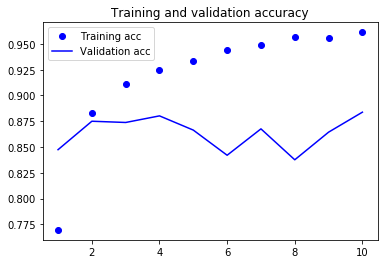

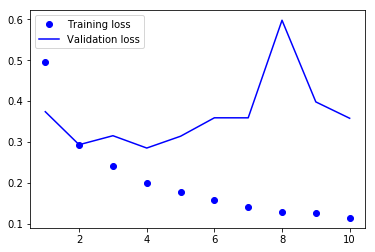

In [8]:
#plotting results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

plt.show()

In [9]:
model.evaluate(input_test,y_test)

25000/25000 [==============================] - 60s 2ms/step


[0.4182550668299198, 0.864]